In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, output_file
# output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

## Colors

In [4]:
N1 = '#65CBFF'
N2 = '#9595C9'

In [14]:
tauv, sG, N, T, nu, k = 40, 50, 1000, 200000, 100, 0
ratio = 0.5
dt = 0.1
# rasterPath = "../data/rasters/rasterPlast3-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f" % (tauv, 
#                                                                                  sG, N, T, nu, ratio, dt)
# r = np.load(rasterPath)
varPath = "../data/rasters/rastervarPlast6-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f_nu-%d" % (tauv, 
                                                                                 sG, N, T, k, ratio, dt, nu)
var = np.load(varPath)

## DEBUG INSTABILITY

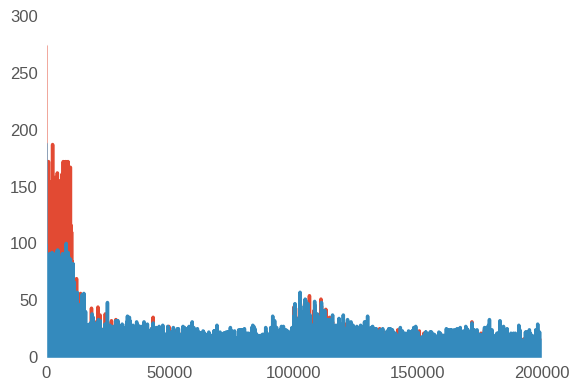

In [15]:
v = var['vvmN1']
plt.plot(v)
plt.plot(var['vvmN2'])
plt.ylim()

plt.figure()



48.4990300194 7.30102861152


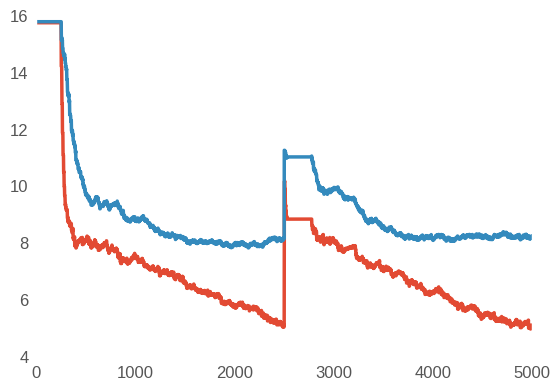

In [16]:
plt.plot(var['g1N1'])
plt.plot(var['g1N2'])
signal = np.array(v)
f_val, p_val = maxPowerFreq(signal[int(signal.shape[0] / 2):], 0.1 / 1000)
print(f_val, p_val)

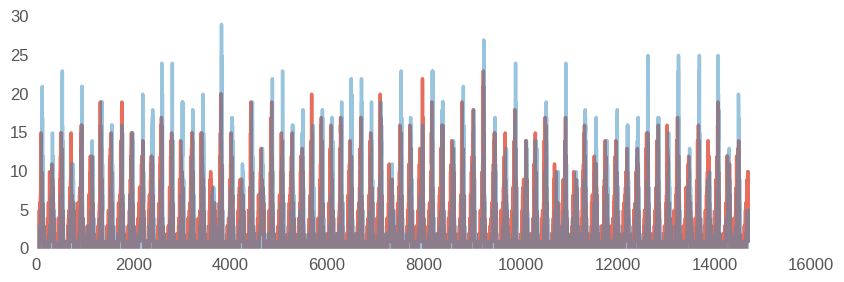

In [17]:
plt.figure(figsize=(10,3))
v = var['vvmN1']
plt.plot(v[65300:80000], alpha=0.8)
v = var['vvmN2']
plt.plot(v[65300:80000], alpha=0.5)
# plt.plot(var['i1N1'][16300:16350])
# plt.ylim([-200,200])

## dt = 0.1

In [14]:
N, g, tauv, i, nu = 1000, 2.8*2,15,0,190
T = 10000

gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=45,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 150,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
print(gpu.lowspthresh)
gpu.dt = 0.1
gpu.ratio = 0.2
gpu.FACT = 500
gpu.runTFSimul()

1.5
56.49


In [16]:
a = tf.ones((10 , 10), dtype=tf.bool)

0.0 2.869474742


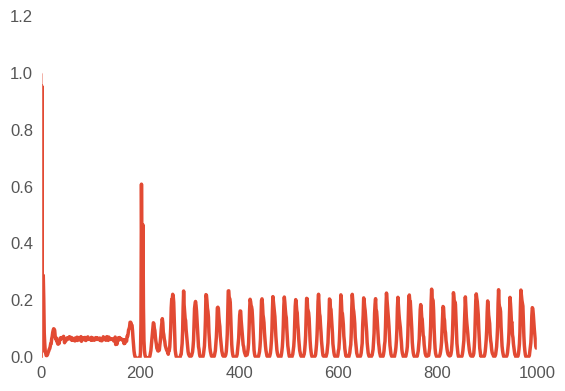

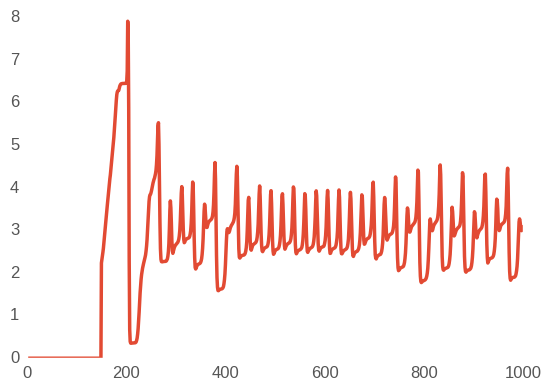

In [12]:
plt.plot(gpu.vvm)
plt.figure()
plt.plot(gpu.gamma)
print(gpu.gamma[60], gpu.gamma[900])

In [4]:
g = 20
N = 1000
T = 10000
nu = 100
sG = 50
tauv = 25
gpu1 = TfConnEvolveNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 1000,
                  nu = nu,
                  NUM_CORES = 1,
                  both=False,
                 sG = sG,
                      memfraction = 0.5
                      )
# gpu.input = apple
gpu1.dt = 0.1
gpu1.initWGap = -1
gpu1.g1 = 20
gpu1.g2 = 20
gpu1.debug = False
gpu1.connectTime=int(T/2)
gpu1.FACT = 200
gpu1.ratio = 0.5
gpu1.runTFSimul()


22.23



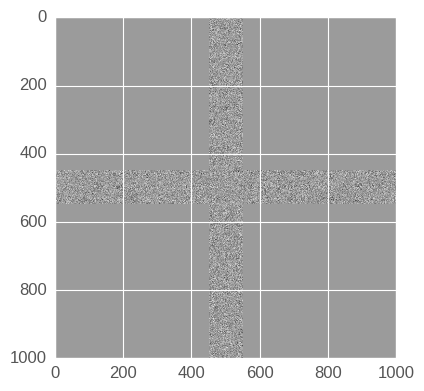

In [5]:
plt.imshow(gpu1.wGap_init_S)

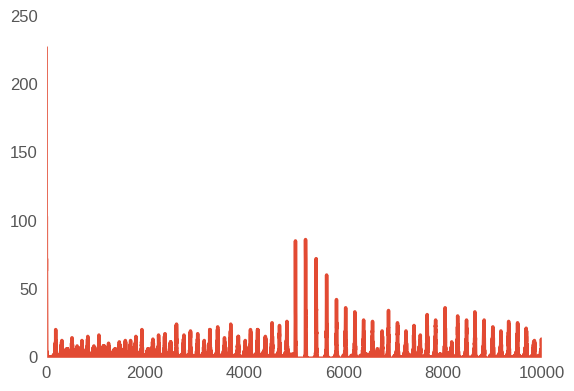

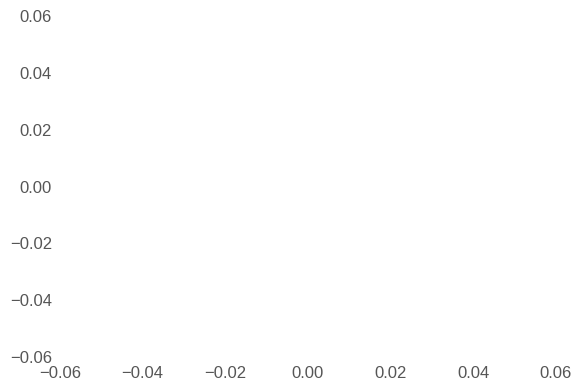

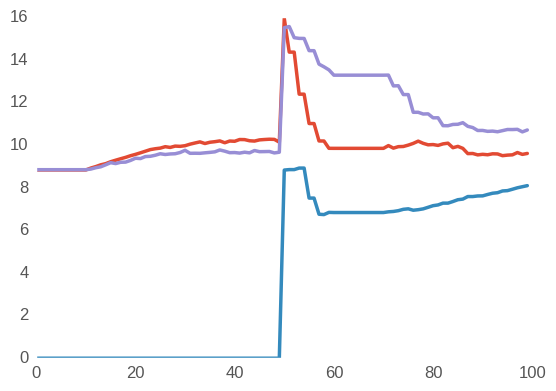

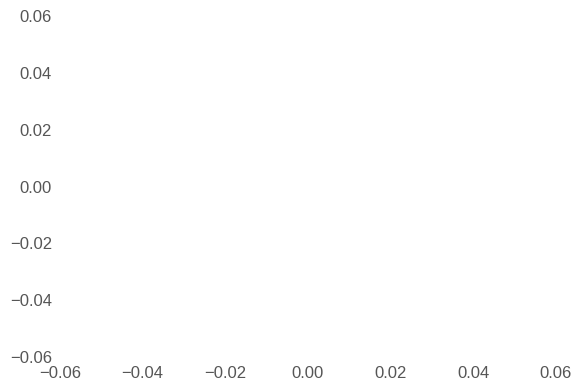

In [5]:
plt.plot(gpu1.vvmN1)
plt.plot(gpu1.vvmN2)
# plt.plot(gpu1.i1)
# plt.plot(gpu1.i2)
# plt.ylim([0,1000])
plt.figure()
plt.plot(gpu1.i1)
plt.figure()
plt.plot(gpu1.gammaN1)
plt.plot(gpu1.gammaNS)
plt.plot(gpu1.gammaN2)
plt.plot(gpu1.gammaTest)

plt.figure()
plt.plot(gpu1.plastON)


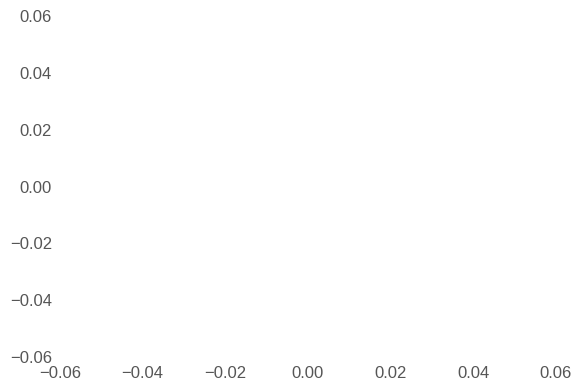

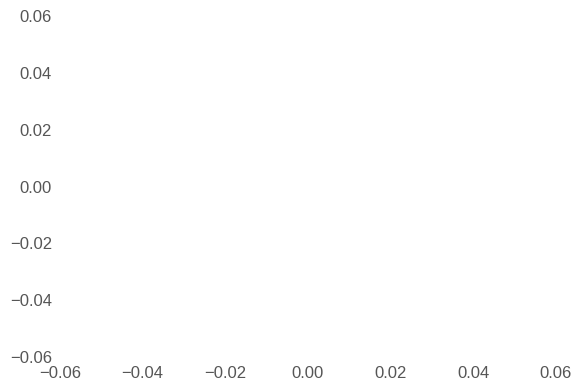

In [10]:
s = 190000
d = 2000
e = s+d
v1 = gpu1.vvmN1[s:e]
v2 = gpu1.vvmN2[s:e]
i1 = gpu1.i1[s:e]
i2 = gpu1.i2[s:e]
# g1 = gpu1.gammaN1[s:e]
# g2 = gpu1.gammaN2[s:e]
# gS = gpu1.gammaNS[s:e]


plt.plot(v1)
plt.plot(v2)
# plt.plot(gpu1.i1)
# plt.plot(gpu1.i2)
# plt.ylim([0,1000])
plt.figure()
plt.plot(i1)
plt.plot(i2)
# plt.figure()
# plt.plot(g1)
# plt.plot(g2)
# plt.plot(gS)


## dt = 1

In [67]:
g = 10
N = 1000
T = 10000
nu = 100
sG = 20
tauv = 45
gpu = TfConnEvolveNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 0,
                  nu = nu,
                  NUM_CORES = 1,
                  both=False,
                 sG = sG,
                memfraction = 0.95
                      )
# gpu.input = apple
gpu.dt = 0.1
gpu.debug = False
gpu.connectTime=0
gpu.FACT = 400
gpu.ratio = 0.5
gpu.runTFSimul()


41.77



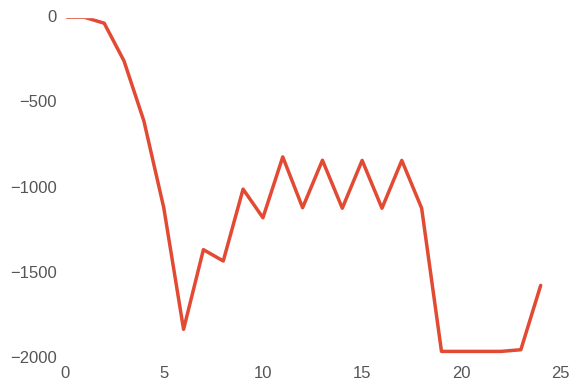

In [51]:
plt.plot(gpu.dwcontrol[0:25])

(0, 25)

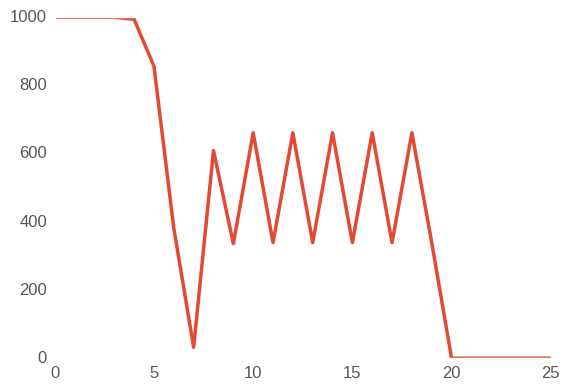

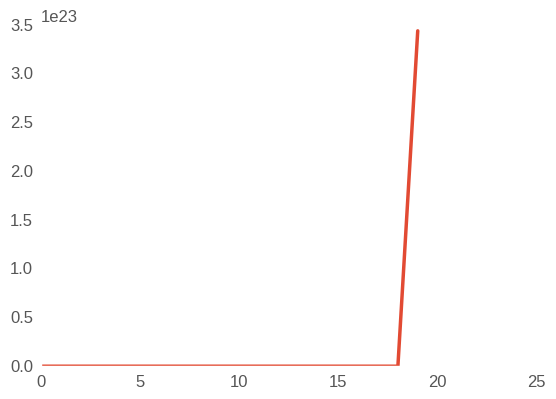

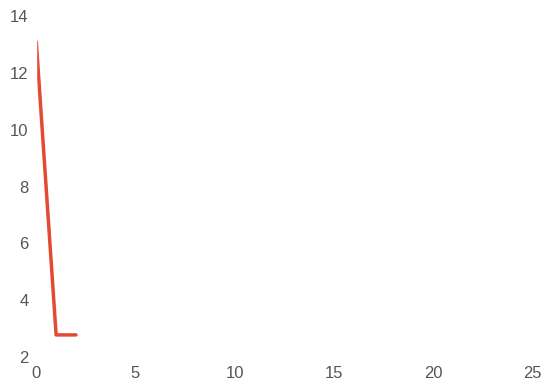

In [52]:
plt.plot(gpu.vvmN1)
plt.xlim([0,25])
plt.figure()
plt.plot(gpu.i1)
plt.xlim([0,25])

plt.figure()
plt.plot(gpu.gammaN1)
plt.xlim([0,25])



In [85]:
class Izh:
    def __init__(self, T=3000, tauv=15):
        self.bTh = 1.5
        self.u_, self.v_, self.p_, self.lowsp_, self.vv_, self.gamma_ = [], [], [], [], [], []
        self.alphaLTD = 4.7e-6
        self.T = T
        self.tauv = tauv
        self.dt = 0.25
        # stimulation
        
        
    def sim(self):
        dt = self.dt
        v = -70
        u, lowsp, p = 0, 0, 0
        gamma = 10
        self.I = [300 if (i*dt)%500<50 else -82 for i in range(int(self.T/dt))]
        for i in range(int(self.T/dt)):
            # voltage
            try:
                v = v + dt / self.tauv * ((v+60) * (v+50) - 20 * u + 8 * self.I[i])
            except:
                print(i)
                print(len(self.I))
            # adaptation
            u = u + dt * 0.044 * (v+55 - u)
            # spike
            vv = v> 25
            # reset
            v = vv * -40 + (1-vv)*v
            u = u + vv * 50
            # burst
            lowsp = lowsp + dt/8.0 * (vv * 8.0/dt - lowsp)
            p = lowsp>self.bTh
            gamma += p*(-self.alphaLTD)
            # save stuffs
            self.lowsp_.append(lowsp)
            self.p_.append(p)
            self.v_.append(v)
            self.u_.append(u)
            self.vv_.append(vv)
            self.gamma_.append(gamma)


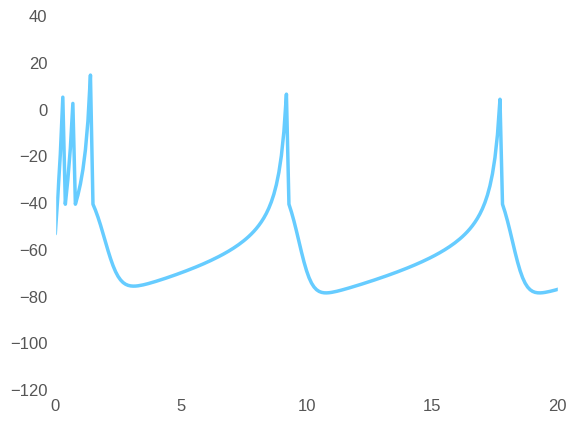

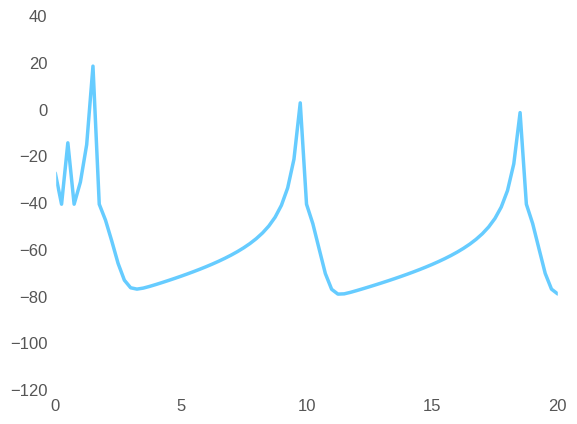

In [87]:
fig = plt.figure(figsize=(6,4.5))
izh = Izh(T=6000)
izh.dt = 0.1
izh.sim()
T = izh.T
t = np.arange(int(T/izh.dt))*izh.dt
plt.plot(t,izh.v_, label='membrane voltage [mV]', color="#66ccff")
plt.xlim([0,20])
plt.tight_layout()

fig = plt.figure(figsize=(6,4.5))
izh = Izh(T=6000)
izh.dt = 0.25
izh.sim()
T = izh.T
t = np.arange(int(T/izh.dt))*izh.dt
plt.plot(t,izh.v_, label='membrane voltage [mV]', color="#66ccff")
plt.xlim([0,20])
plt.tight_layout()

In [83]:
nbInCluster = 100 
sG = 10
N=200

ones = tf.ones((nbInCluster + sG, nbInCluster + sG), dtype=tf.bool)
conn_1 = tf.pad(ones, [[0, N-(nbInCluster+sG)], [0, N-(nbInCluster+sG)]])
conn_2 = tf.pad(ones, [[N - (nbInCluster + sG), 0], [N-(nbInCluster+sG), 0]])

tzr = tf.ones((N, N)) - tf.diag(tf.ones(N))

ones = tf.ones((nbInCluster - sG, nbInCluster - sG), dtype=tf.bool)
conn1 = tf.pad(ones, [[0, N - (nbInCluster - sG)], [0, N - (nbInCluster - sG)]])
conn2 = tf.pad(ones, [[N - (nbInCluster - sG), 0], [N - (nbInCluster - sG), 0]])

connS1 = tf.logical_and(tf.logical_not(conn1), conn_1)
connS2 = tf.logical_and(tf.logical_not(conn2), conn_2)
connS = tf.logical_or(connS1, connS2)

conn0 = tf.mul(tf.to_float(tf.logical_or(conn1, conn2)), tzr) 
conn = tf.mul(tf.to_float(tf.logical_or(tf.logical_or(conn1, conn2), connS)), tzr) 

connS = tf.mul(tf.to_float(connS), tzr)
W = tf.Variable(tf.ones((N,N)))
W1 = tf.Variable(tf.ones((N,N)))
W2 = tf.Variable(tf.ones((N,N)))
step = tf.group(
    W.assign(connS),
    W1.assign(conn0 ),
    W2.assign(conn )
)
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

step.run()



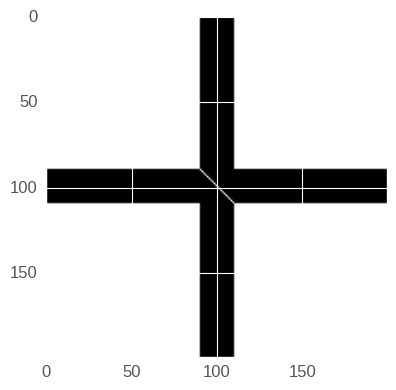

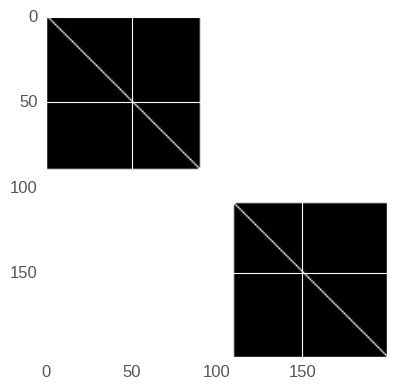

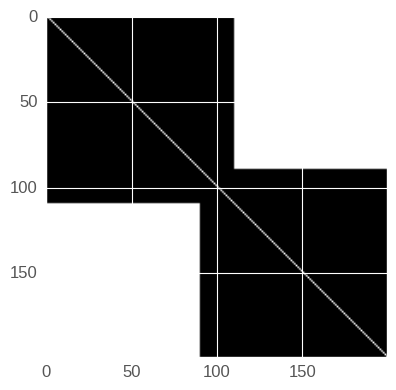

In [84]:
plt.imshow(W.eval())
plt.figure()
plt.imshow(W1.eval())
plt.figure()
plt.imshow(W2.eval())

In [9]:
a = b= 2
a

2